In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid", color_codes=True)

In [2]:
data = pd.read_csv('clean_data.csv', index_col='Unnamed: 0')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data['Deck']=data['Cabin'].apply(lambda x: x[0] if not pd.isnull(x) else x)

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,1305,0,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S,NaN
1302,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,C
1303,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
1304,1308,0,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,NaN,S,NaN


In [5]:
# titanic = sns.load_dataset("titanic")
# print(titanic.shape)
# titanic.head()

<img src="model.jpg">

### Variables to consider:
- Target: <code>Survived</code>
- Discrete: <code>Pclass, Sex</code>
- Currently continuous: <code>Fare, Age, Cabin</code>

### <code>Pclass</code> and <code>Sex</code>
- Using: <code>barplot()</code>
- Taking estimate (mean by default)
- A confidence interval around the estimate is calculated, visualized by error bars

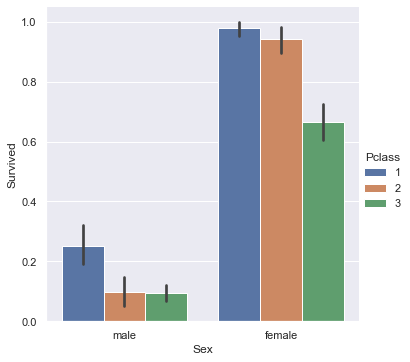

In [6]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=data)

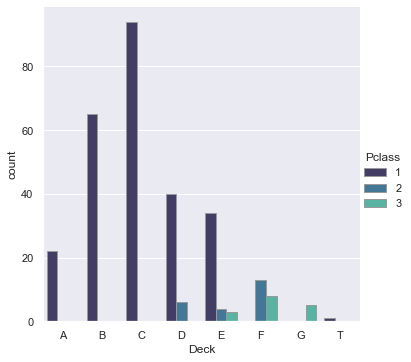

In [98]:
sns.catplot(x="Deck", hue="Pclass", kind="count", order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],
            palette="mako", edgecolor=".6",
            data=data)

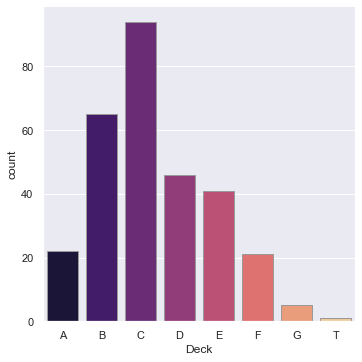

In [99]:
sns.catplot(x="Deck", kind="count", order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'],
            palette="magma", edgecolor=".6",
            data=data)

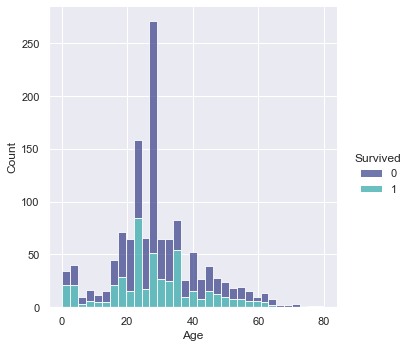

In [125]:
sns.displot(data=data, x="Age", hue="Survived", multiple="stack", palette="mako")

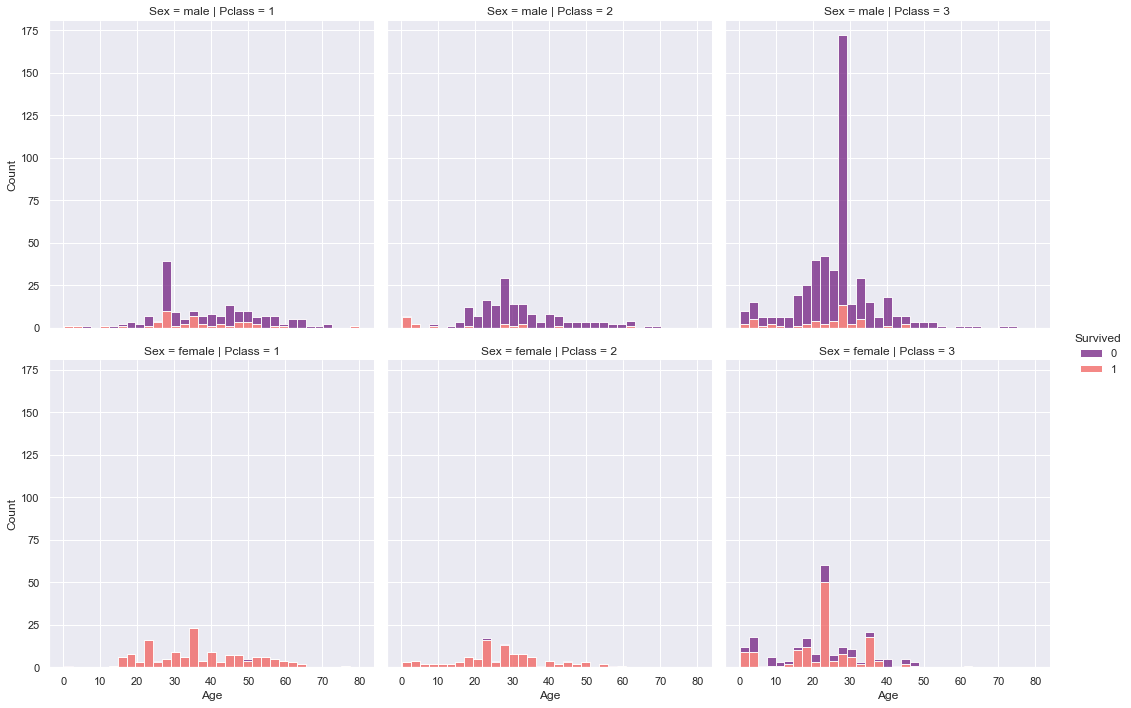

In [117]:
sns.displot(data=data, x="Age", hue="Survived", col="Pclass", row="Sex", multiple="stack", palette="magma")

## Dataset

In [118]:
train = pd.read_csv('titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
train['Title']=train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train.Title.value_counts()
def girl(aa):
    if (not np.isnan(aa.Age))&(aa.Title=='Miss')&(aa.Age<=14):
        return 'Girl'
    elif (np.isnan(aa.Age))&(aa.Title=='Miss')&(aa.Parch!=0):
        return 'Girl'
    else:
        return aa.Title

train['Title']=train.apply(girl,axis=1)

Tit=['Mr','Miss','Mrs','Master','Girl','Rareman','Rarewoman']
for i in Tit:
    train.loc[(np.isnan(train.Age))&(train.Title==i),'Age']=train.loc[train.Title==i,'Age'].median()
# https://www.programmersought.com/article/74205101984/

In [120]:
train_data_only = train.copy(deep=True)
raw_age = train.Age.values.reshape(-1, 1)
raw_age.shape

(891, 1)

In [50]:
def null_values(data):
    print("Number of null values:\n", data.isnull().sum())

In [51]:
null_values(train)

Number of null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              1
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64


In [52]:
train = train.dropna(subset=['Age', 'Fare'])

In [53]:
train.reset_index(inplace=True)
train = train.drop(labels=['index', 'Title'], axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
886,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
887,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,5.0,1,2,W./C. 6607,23.4500,NaN,S
888,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
from sklearn.cluster import KMeans

In [55]:
fare = train['Fare'].values.reshape(-1, 1)
clf = KMeans(n_clusters=3).fit(fare)
fare_clf = clf.predict(fare)
train['Fare'] = fare_clf

In [56]:
train['Pclass'] = train['Pclass'] - 1

train.loc[train.Age < 15,'Age'] = 0
train.loc[(train.Age >= 15) & (train.Age < 30), 'Age'] = 1
train.loc[(train.Age >= 30) & (train.Age < 55), 'Age'] = 2
train.loc[train.Age >= 55, 'Age'] = 3

# data.loc[data.Cabin.isnull(), 'Cabin'] = 0
# data.loc[data.Cabin.notnull(), 'Cabin'] = 1

train.loc[train.Sex == 'male', 'Sex'] = 0
train.loc[train.Sex == 'female', 'Sex'] = 1

to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Embarked']
train = train.drop(columns = to_drop, axis=1)

In [57]:
train['Deck'] = train['Cabin'].apply(lambda x: x[0] if not pd.isnull(x) else np.NaN)
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Deck
0,0,2,0,1.0,2,NaN,NaN
1,1,0,1,2.0,0,C85,C
2,1,2,1,1.0,2,NaN,NaN
3,1,0,1,2.0,0,C123,C
4,0,2,0,2.0,2,NaN,NaN


In [58]:
train = train.drop(columns=['Cabin'], axis=1)
train

,Survived,Pclass,Sex,Age,Fare,Deck
0,0,2,0,1.0,2,NaN
1,1,0,1,2.0,0,C
2,1,2,1,1.0,2,NaN
3,1,0,1,2.0,0,C
4,0,2,0,2.0,2,NaN
...,...,...,...,...,...,...
885,0,1,0,1.0,2,NaN
886,1,0,1,1.0,2,B
887,0,2,1,0.0,2,NaN
888,1,0,0,1.0,2,C


In [59]:
train.Age = train.Age.astype(int)

In [60]:
deck_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
train.Deck.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

In [61]:
train['DeckN'] = train['Deck'].apply(lambda x: deck_dict[x] if not pd.isnull(x) else 0)
train.DeckN.astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,Deck,DeckN
0,0,2,0,1,2,NaN,0
1,1,0,1,2,0,C,3
2,1,2,1,1,2,NaN,0
3,1,0,1,2,0,C,3
4,0,2,0,2,2,NaN,0


In [62]:
train_de = train.drop(columns=['Deck'], axis=1)

In [63]:
train_de.head()

,Survived,Pclass,Sex,Age,Fare,DeckN
0,0,2,0,1,2,0
1,1,0,1,2,0,3
2,1,2,1,1,2,0
3,1,0,1,2,0,3
4,0,2,0,2,2,0


In [64]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import BayesianEstimator
import pgmpy.inference
import networkx as nx
import pylab as plt

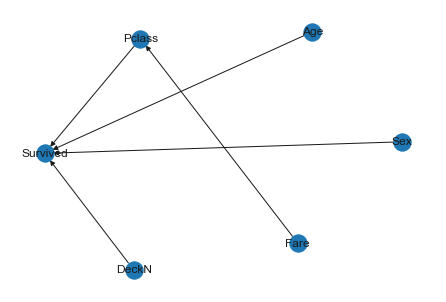

In [65]:
model = BayesianModel([('Fare', 'Pclass'),
                       ('Pclass', 'Survived'),
                       ('Age', 'Survived'),
                       ('DeckN', 'Survived'),
                       ('Sex', 'Survived')])
nx.draw(model, with_labels=True)

In [66]:
from sklearn.model_selection import train_test_split
import cv
from sklearn.metrics import accuracy_score

In [67]:
X_train, X_test, y_train, y_test = train_test_split(train_de, train_de, test_size=0.2, random_state=42)

In [68]:
model.fit(X_train, estimator=BayesianEstimator, prior_type="BDeu")

In [69]:
test_data = X_test.drop(columns=['Survived'], axis=1)
y_pred = model.predict(test_data)

100%|██████████| 51/51 [00:02<00:00, 18.86it/s]


In [70]:
accuracy_score(y_pred['Survived'], X_test['Survived'])

0.8202247191011236

In [71]:
# scores = cv.cross_val(model, train, 10, "Survived")

In [72]:
train

,Survived,Pclass,Sex,Age,Fare,Deck,DeckN
0,0,2,0,1,2,NaN,0
1,1,0,1,2,0,C,3
2,1,2,1,1,2,NaN,0
3,1,0,1,2,0,C,3
4,0,2,0,2,2,NaN,0
...,...,...,...,...,...,...,...
885,0,1,0,1,2,NaN,0
886,1,0,1,1,2,B,2
887,0,2,1,0,2,NaN,0
888,1,0,0,1,2,C,3


In [73]:
train['DeckNN'] = train['Deck'].apply(lambda x: deck_dict[x] if not pd.isnull(x) else np.NaN)
train_den = train.drop(columns=['Deck', 'DeckN'], axis=1)
train_den

,Survived,Pclass,Sex,Age,Fare,DeckNN
0,0,2,0,1,2,NaN
1,1,0,1,2,0,3.0
2,1,2,1,1,2,NaN
3,1,0,1,2,0,3.0
4,0,2,0,2,2,NaN
...,...,...,...,...,...,...
885,0,1,0,1,2,NaN
886,1,0,1,1,2,2.0
887,0,2,1,0,2,NaN
888,1,0,0,1,2,3.0


In [74]:
model2 = BayesianModel([('Fare', 'Pclass'),
                       ('Pclass', 'Survived'),
                       ('Age', 'Survived'),
                       ('DeckNN', 'Survived'),
                       ('Sex', 'Survived')])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(train_den, train_den, test_size=0.2, random_state=42)
model2.fit(X_train, estimator=BayesianEstimator, prior_type="BDeu")
test_data = X_test.drop(columns=['Survived'], axis=1)
y_pred = model2.predict(test_data)
accuracy_score(y_pred['Survived'], X_test['Survived'])

100%|██████████| 51/51 [00:00<00:00, 728.53it/s]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Different age clustering

In [76]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [87]:
raw_age = raw_age[~np.isnan(raw_age)]
raw_age = raw_age.reshape(-1, 1)

In [89]:
params = range(2, 16)
param_grid = ParameterGrid({'n_clusters': params})
best_score = -1
kmeans_model = KMeans()
silhouette_scores = []
for p in param_grid:
    kmeans_model.set_params(**p)
    kmeans_model.fit(raw_age)
    ss = silhouette_score(raw_age, kmeans_model.labels_)
    silhouette_scores += [ss]
    print('Parameter: {}, Score: {}'.format(p, ss))
    if ss > best_score:
        best_score = ss
        best_grid = p

Parameter: {'n_clusters': 2}, Score: 0.8327949550507278
Parameter: {'n_clusters': 3}, Score: 0.9354548749546939
Parameter: {'n_clusters': 4}, Score: 1.0


<ipython-input-89-da1567c0ac89>:8: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  kmeans_model.fit(raw_age)


Parameter: {'n_clusters': 5}, Score: 1.0


<ipython-input-89-da1567c0ac89>:8: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  kmeans_model.fit(raw_age)
<ipython-input-89-da1567c0ac89>:8: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans_model.fit(raw_age)
<ipython-input-89-da1567c0ac89>:8: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans_model.fit(raw_age)
<ipython-input-89-da1567c0ac89>:8: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans_model.fit(raw_age)
<ipython-input-89-da1567c0ac89>:8: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  kmeans_model.fit(raw_age)
<ipython-input-89-da1567c0ac89>:8: ConvergenceWarning:

Parameter: {'n_clusters': 6}, Score: 1.0
Parameter: {'n_clusters': 7}, Score: 1.0
Parameter: {'n_clusters': 8}, Score: 1.0
Parameter: {'n_clusters': 9}, Score: 1.0
Parameter: {'n_clusters': 10}, Score: 1.0
Parameter: {'n_clusters': 11}, Score: 1.0
Parameter: {'n_clusters': 12}, Score: 1.0
Parameter: {'n_clusters': 13}, Score: 1.0
Parameter: {'n_clusters': 14}, Score: 1.0
Parameter: {'n_clusters': 15}, Score: 1.0


<ipython-input-89-da1567c0ac89>:8: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  kmeans_model.fit(raw_age)
<ipython-input-89-da1567c0ac89>:8: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  kmeans_model.fit(raw_age)
<ipython-input-89-da1567c0ac89>:8: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  kmeans_model.fit(raw_age)
